# Climate Projection

## Homework 1 : Heatwaves in a changing climate

The aim of the homework is to explore temperature timeseries to identify events of significant heat, and to reflect on the identification of these events. In the title above, the term *'heat wave'* is used, and it will be defined below. We invite you to begin with a 'naive' exploration of the data, so as to identify some of the difficulties which may arise in quantifying what could seem, a priori, as a simple event. 

The instructions below provide you with access to several datasets and to functions proposed as a starting point to explore these. Again, there is not a *right* answer, rather there are interesting questions and differents directions for analysis of the data.   

The proposed datasets are:    
- the SIRTA timeseries of measurements, recalled because it is familiar from the analyses in classwork, 
- a timeseries of temperatures for Paris, from 1970 to 2000, to serve as a reference period for Paris,
- two timeseries of temperatures from simulations of a climate model for the period 2006-2100. The chosen model is the climate model of IPSL for the CMIP5 exercise, run with the RCP8.5 scenario for emissions, which corresponds to the strongest emissions considered. 

The locations chosen are
- Paris, 48°N latitude and 2°E longitude; estimated population of 2,1 million, or 12,3 million if we include Ile-de-France as a whole, 
- Mumbai, formerly known as Bombay, 19°N latitude and 72°E longitude; estimated population of 12,5 million. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

### The SIRTA timeseries

The SIRTA timeseries is recalled because it has become familiar from classwork, and it has hourly time resolution which is interesting. Relative to the classwork, some additional instructions have been included to highlight times when the *hourly* temperature measurements are larger than a given threshold. 

In [2]:
# Read the CSV file
file_path = 'data/tas_sirta.csv'
tsirh_df = pd.read_csv(file_path, delimiter = ";", index_col=0)
tsirh_df.index = pd.to_datetime(tsirh_df.index, unit = 's')

A note on the names of variables: 
- t for temperature
- sir/par/mum for SIRTA, Paris, Mumbai respectively
- h/p for historical (h) or projection (p)
- df/ar to indicate a pandas DataFrame (df) or a standard numerical array (ar)
So that tsirh_df is the temperature for SIRTA in a DataFrame (historical measurements, hourly resolution); tparp_df is the 
timeseries for Paris, in one climate projection, in a DataFrame.

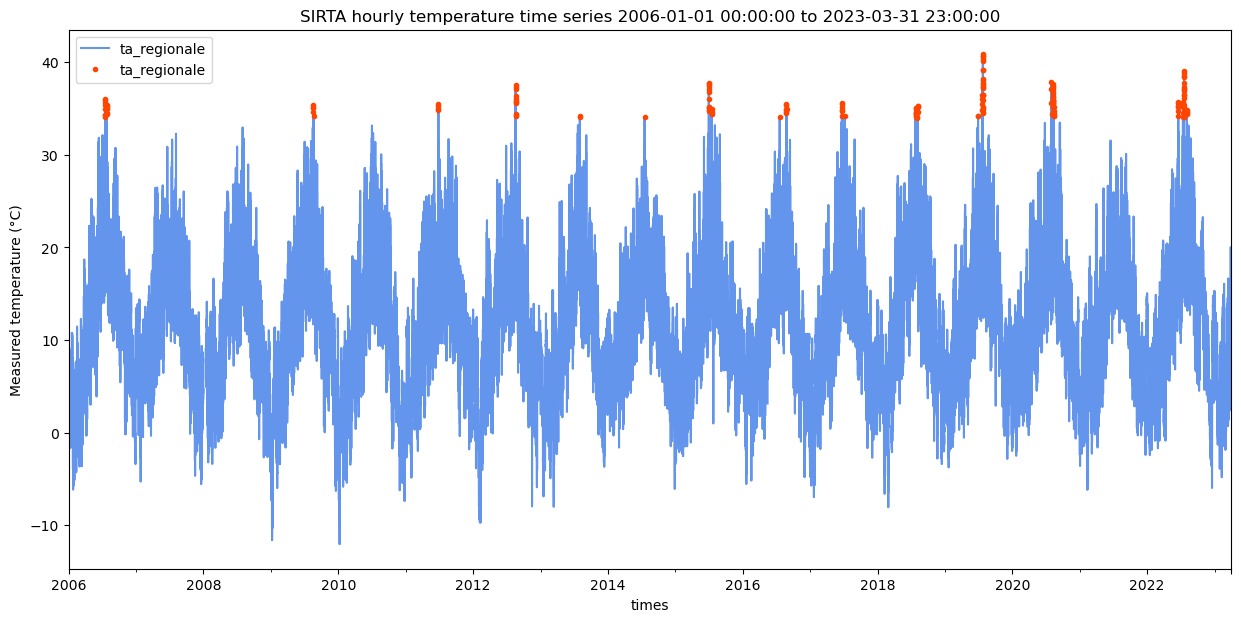

In [3]:
# As a first, naive exploration of hot events, a straightforward threshold for hourly temperature is proposed
temp_hot = 34.0                         ## THRESHOLD TO BE PLAYED WITH
# Plot of the SIRTA timeseries with a highlight for hot hours
ax1 = tsirh_df.plot(label='temperature observations from SIRTA',color='cornflowerblue',figsize=(15,7)) 
###     The list of named colors in matplotlib: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
tsir_hot = tsirh_df['ta_regionale']>temp_hot              #  tsir_hot is indexed by time, but contains booleans (True / False)
tsirh_df[tsir_hot].plot(ax=ax1, marker = '.', color = 'orangered', linestyle = 'None')     
                                                          #  in the above, we use tsir_hot to select only specific times  
plt.ylabel('Measured temperature (°C)')
plt.title(f"SIRTA hourly temperature time series {tsirh_df.index[0]} to {tsirh_df.index[-1]}")
plt.show()

### Reference timeseries for Paris

A dataset of observations for temperatures in Paris is also provided, for the period 1970-2000 to serve as a reference period. 

In [4]:
# Reading the CSV file
file_path = 'data/paris_1970_2000.csv'
#dfh = pd.read_csv(file_path, delimiter = ",", index_col=0, header = None)
tparh_df = pd.read_csv(file_path, delimiter = ",", index_col=0)
tparh_df.index = pd.to_datetime(tparh_df.index)
tparh_df += -273.15                               # conversion in Celsius 

In [5]:
pcol = 'mediumblue'; mcol = 'crimson'      # colors to differentiate plots concerning Paris or Mumbai
pcom = 'aqua'      ; mcom = 'sandybrown'   # colors for the annual means
                                           # python's named colors: https://matplotlib.org/stable/gallery/color/named_colors.html

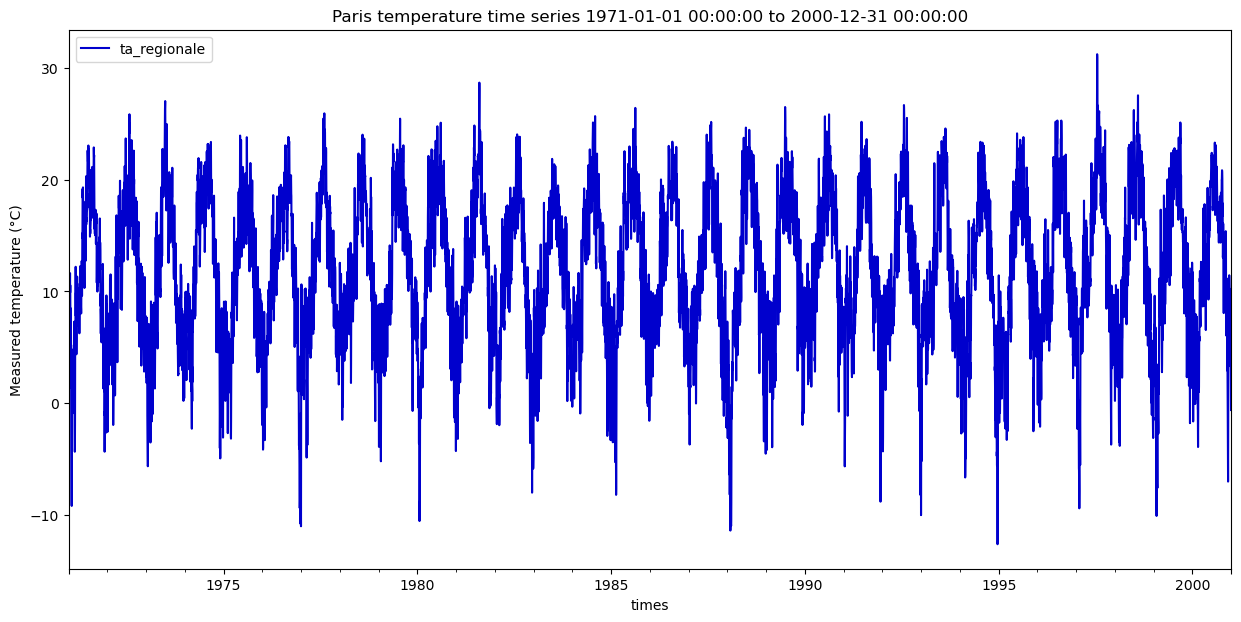

In [6]:
ax1 = tparh_df.plot(label='temperature timeseries for Paris',color=pcol,figsize=(15,7)) 
plt.ylabel('Measured temperature (°C)')
plt.title(f"Paris temperature time series {tparh_df.index[0]} to {tparh_df.index[-1]}")
plt.show()

Similarly, historical data for Mumbai is introduced below. 

In [7]:
file_path = 'data/mumbai_1970_2000.csv'
tmumh_df = pd.read_csv(file_path, delimiter = ",", index_col=0)
tmumh_df.index = pd.to_datetime(tmumh_df.index)
tmumh_df += -273.15                               # conversion in Celsius 

### Your turn ! 

The goal of this homework is to reflect and try to propose criteria in order to identify heatwaves using historical data and then explore outputs from climate projections. 

A first step consists in going from naive indicators of *'hot events'* to quantitative criteria for heat waves. For the sake of simplicity, we will work here only with the physical temperature (*). 

(*) Many indicators of heatwaves are developped that take into account the humidity (technically, they are based onthe *wet-bulb* temperature, which gives information not only on the physical temperature, but also on the thermoregulation capacity of living organisms, and in particular human. The wet-bulb temperature is the temperature of an air parcel *cooled down to saturation* (https://en.wikipedia.org/wiki/Wet-bulb_temperature). For air that is 100% saturated, the wet-bulb temperature and the temperature coincide. 

As a starting point we provide the definition below.   
According to the [IPCC glossary](https://apps.ipcc.ch/glossary/), a heat wave is defined in the AR6 by 
> *"A period of abnormally hot weather, often defined with reference to a relative __temperature threshold__, lasting from __two days to months__. Heatwaves and warm spells have various and, in some cases, overlapping definitions."*

Note that the definition includes not only the *amplitude* of the temperature fluctuations, but also the *duration*. Regarding amplitudes, it is natural to begin with an absolute threshold, which will identify heat waves in the warmest season; yet the definition does mention *abnormally hot* and mentions *warm spells*, highlighting that it will also be (in a second step) interesting to investigate periods that are warmer than expected, eg in the cold season. While less impactful to humans, these may matter for ecosystems. 

We propose below functions and instructions to help you write a Python function that go through a time series of temperature (365-length array of daily mean temperature at a specific location for example) and returns the number of heatwave days in a year, first according to an arbitrary threshold that you will specify. We first focus only on the threshold, not the number of consecutive days.

You are given a temperature array with hourly frequency, we first need to choose a relevant specific indicator representing well the information we need about the daily distribution of temperature, in order to specify what is a "hot weather". Would you pick the max ? the mean ? When identifying events of intense heat from timeseries with hourly resolution, on one hand, and with daily resolution, on the other hand, do we obtain the same results? Should we use the same thresholds?  

### From a timeseries with hourly resolution, identify daily mean and daily max temperatures

There are several ways to code this. Below we first show how this can be carried out with methods included in the pandas package, for efficiency. (This can be taken as an invitation to take some time to read and learn about coding, now or later.) It is however not expected that you learn about specific pyhton packages, this is not the purpose, so we then return to manipulation of standard numerical arrays.

In [8]:
SSTmean = tsirh_df.groupby(pd.Grouper(freq='1D')).mean()       ### Group dataframe values with daily frequency, then take the mean
SSTmax  = tsirh_df.groupby(pd.Grouper(freq='1D')).max()        ### Group dataframe values with daily frequency, then take the max

In [9]:
dts = dt.datetime(2015,1,1); dte = dt.datetime(2015,12,31)      # 's' for start, 'e' for end

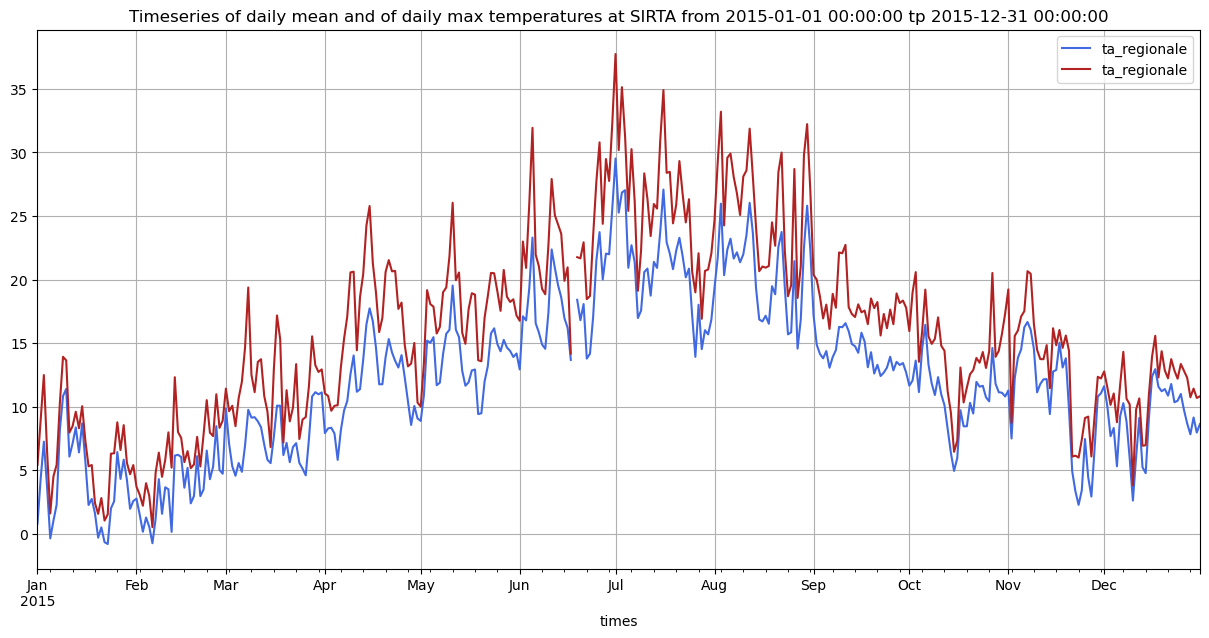

In [10]:
ax1 = SSTmean[dts:dte].plot(figsize=(15,7),color='royalblue')
SSTmax[dts:dte].plot(ax=ax1,color='firebrick')
plt.title(f'Timeseries of daily mean and of daily max temperatures at SIRTA from {dts} tp {dte}')
plt.grid()
plt.show()

Now we introduce a fuinction to **count the number of days above a given temperature threshold**.    

From here, we return to manipulating standard arrays, which may make coding more straightforward, though less compact. The function has been coded assuming inputs that are simple arrays (not pandas DataFrames), so we need to provide, as inputs, the temperature values as arrays. This is obtained from a DataFrame using 'df['var'].values', where df is the DataFrame, and var is the named column. A function to identify the daily mean and max temperatures (as above but from standard arrays) is also provided.

In [11]:
### A function to count the number of daily values above a threshold
def nb_heatwaves_simple(tas_array, threshold):
    """
    Parameters:
    tas_array (list or array-like): The array of daily values
    threshold (float or int): The threshold value to compare against.

    Returns:
    int: The count of values greater than the threshold.
    """
    nb_hw_d = 0
    for value in tas_array:
        if value > threshold:
            nb_hw_d += 1
    return nb_hw_d

### A function to count the number of values over a given threshold, but using arrays as inputs
### This function will be useful later in the notebook; it is somewhat redundant relative to instructions 
### carried out above that use the pandas capabilities
def hrly_to_dly(hourly_temperatures, ind, yr):
    """
    Counts the number of values in tas_array that are greater than the given threshold.

    Parameters:
    hourly_temperatures (list or array-like): array of hourly tas values.
    ind (string): indicator chosen, "max" or "mean"

    Returns:
    tasd_array: array of daily tas values for the selected indicator
    """
    hours_per_day = 24
    
    bisext = 1
    if yr%4:
        bisext = 0
    
    if ind == "mean":
        daily_mean_temperatures = []
        
        # Loop through each day
        for day in range(365+bisext):
            # Calculate the start and end index for the current day's temperatures
            start_index = day * hours_per_day
            end_index = start_index + hours_per_day
            # Get the temperatures for the current day
            daily_temperatures = hourly_temperatures[start_index:end_index]
            # Calculate the mean temperature for the current day
            daily_mean_temperature = sum(daily_temperatures) / hours_per_day
            daily_mean_temperatures.append(daily_mean_temperature)
        return daily_mean_temperatures
    elif ind == "max":
        daily_max_temperatures = []
        
        # Loop through each day
        for day in range(365):
            # Calculate the start and end index for the current day's temperatures
            start_index = day * hours_per_day
            end_index = start_index + hours_per_day
            # Get the temperatures for the current day
            daily_temperatures = hourly_temperatures[start_index:end_index]
            # Calculate the max temperature for the current day
            daily_max_temperature = np.max(daily_temperatures)
            daily_max_temperatures.append(daily_max_temperature)
        return daily_max_temperatures

Let us apply these on the measurements from SIRTA and count days above a given threshold, then investigate the duration of hot events. What threshold would seem relevant to you ?


In [12]:
nb_mean30 = nb_heatwaves_simple(SSTmean['ta_regionale'][dts:dte].values, 30)
nb_max30 = nb_heatwaves_simple(SSTmax['ta_regionale'][dts:dte].values, 30)

nb_mean25 = nb_heatwaves_simple(SSTmean['ta_regionale'][dts:dte].values, 25)
nb_max25 = nb_heatwaves_simple(SSTmax['ta_regionale'][dts:dte].values, 25)

print(f"For the period from {dts} to {dte}")
print(f"  For mean temperature and a threshold at 30°C : {nb_mean30} days")
print(f"  For max temperature and a threshold at 30°C : {nb_max30} days")
print(f"  For mean temperature and a threshold at 25°C : {nb_mean25} days")
print(f"  For max temperature and a threshold at 25°C : {nb_max25} days")

For the period from 2015-01-01 00:00:00 to 2015-12-31 00:00:00
  For mean temperature and a threshold at 30°C : 0 days
  For max temperature and a threshold at 30°C : 13 days
  For mean temperature and a threshold at 25°C : 9 days
  For max temperature and a threshold at 25°C : 47 days


Let us now go further to identify the "heatwave events" and take duration into account, ie identify the events overpassing a certain threshold *for several days*.

In [13]:
def detect_heatwaves(tas_array, threshold, nb_days):
    """
    Detect heatwave events in the daily temperature array.

    Parameters:
    tas_array (list or array-like): The array of daily temperatures.
    threshold (float or int): The temperature threshold for a heatwave.
    nb_days (int): The minimum number of consecutive days for an event to be considered a heatwave.

    Returns:
    list: A list of 0s and 1s where 1 indicates a day that is part of a heatwave event.
    """
    heatwave_events = [0] * len(tas_array)
    consecutive_days = 0

    for i in range(len(tas_array)):
        if tas_array[i] > threshold:
            consecutive_days += 1
        else:
            if consecutive_days >= nb_days:
                for j in range(i - consecutive_days, i):
                    heatwave_events[j] = 1
            consecutive_days = 0

    # Check at the end of the array
    if consecutive_days >= nb_days:
        for j in range(len(tas_array) - consecutive_days, len(tas_array)):
            heatwave_events[j] = 1

    return heatwave_events

 Number of days belonging to a heatwave event for the parameters (30.0°C, 3 days) : 82 


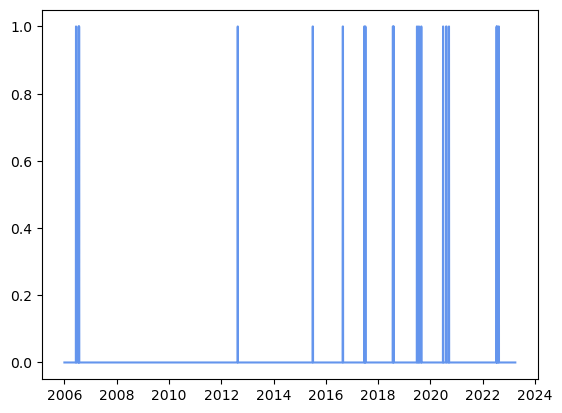

In [14]:
thresh = 30.0
N = 3

dates = SSTmax.index
hwevents_max = detect_heatwaves(SSTmax['ta_regionale'].values, thresh, N)
print(f" Number of days belonging to a heatwave event for the parameters ({thresh}°C, {N} days) : {sum(hwevents_max)} ")
plt.plot(dates, hwevents_max,color='cornflowerblue')
plt.show()

Once the days above a threshold have been identified, it is more illustrative to plot it with the timeseries of temperature and with the indication of the threshold. This is done below. 

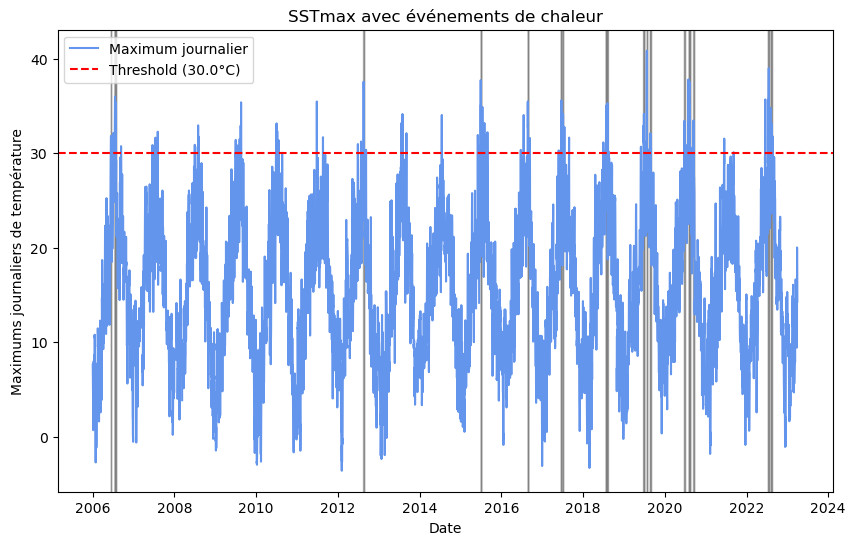

In [15]:
# Création de la figure et de l'axe
fig, ax = plt.subplots(figsize=(10, 6))

# Tracé des valeurs SSTmax
ax.plot(dates, SSTmax, label='Maximum journalier',color='cornflowerblue')

# Ajout des zones grisées pour les jours avec événements (hwevents_max == 1)
for i, event in enumerate(hwevents_max):
    if event == 1:
        ax.axvspan(dates[i], dates[i] + pd.Timedelta(days=1), color='gray', alpha=0.5)
ax.axhline(y=thresh, color='red', linestyle='--', label=f'Threshold ({thresh}°C)')
# Ajout des labels et de la légende
ax.set_xlabel('Date')
ax.set_ylabel('Maximums journaliers de température')
ax.set_title('SSTmax avec événements de chaleur')
ax.legend()

# Affichage du graphique
plt.show()

**A suggestion**: another possibile quantity to investigate is how low the temperatures reach at night. 

### Absolute or relative threshold? 


In the IPCC definition, this threshold relates to the "normal" temperature. How would you estimate this threshold ? What does it imply ?
We will come back to these questions in the section *'to go further'* below. 

### EVOLUTION IN TIME  

In the above we have explored two timeseries of historical temperature measurements and set up a few functions as starting points for their investigation. Below we propose to use these functions to investigate the evolution in time of heat waves, first in the historical timeseries, and then in two timeseries from climate projections. 

#### In historical timeseries

In [16]:
def every_yr_hw(tdf,start_date, end_date, thresh, N,varh='ta_regionale',colh='green'):
    """ Count the number of days when temperature exceeds a given threshold 'thresh', for 'N' consecutive days
    in the period going from start_date to end_date
    """
    # Génération du DatetimeIndex
    date_range = pd.date_range(start=start_date, end=end_date, freq='YS') 
    nbhw_dys = []
    for i in range(len(date_range)-1):
        start_time = date_range[i]
        end_time = date_range[i+1]
        tdflim = tdf[(tdf.index >= start_time) & (tdf.index < end_time)]   #  lim: limited to the period selected
        tas = tdflim[varh].values
        Tmax = hrly_to_dly(tas, "max", yr = date_range[i].year)
        hwevents_max = detect_heatwaves(Tmax, thresh, N)
        nbhw_dys.append(sum(hwevents_max))

    plt.plot(date_range[:-1], nbhw_dys,color=colh)
    plt.title(f"Number of heatwave days per year for a threshold of {thresh}°C overpassed for {N} consecutive days, for the period {start_date.year}-{end_date.year}")
    plt.show()
    return date_range,nbhw_dys

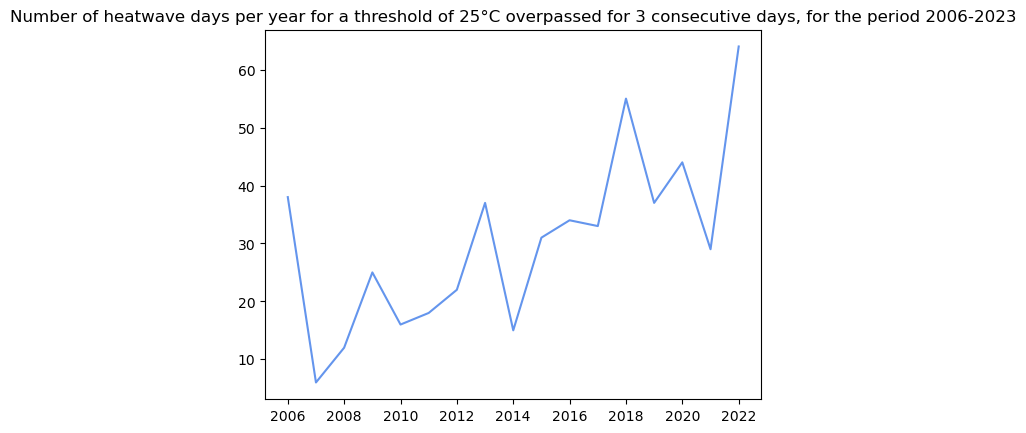

(DatetimeIndex(['2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
                '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
                '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
                '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
                '2022-01-01', '2023-01-01'],
               dtype='datetime64[ns]', freq='YS-JAN'),
 [38, 6, 12, 25, 16, 18, 22, 37, 15, 31, 34, 33, 55, 37, 44, 29, 64])

In [17]:
thresh = 25
N = 3

# Définition des dates de début et de fin
start_date = pd.to_datetime("2006-01-01 00:00:00")
end_date = pd.to_datetime("2023-01-01 00:00:00")
every_yr_hw(tsirh_df,start_date, end_date, thresh, N,colh='cornflowerblue')

### In Projections for a changing climate

Below we propose timeseries for Paris and Mumbai from a climate projection of CMIP5 (*). The purpose is to make start exploring, and to outline relevant questions that can be investigated with such data. 

>The **limitations of the data** should be kept in mind: these are only two locations, from two models, for ***one scenario*** of emissions, RCP8.5. This scenario corresponds to the largest emissions considered in CMIP5, resulting in a forcing of approximately 8.5 W/m2 by 2100. The purpose of these scenarios is to explore the range of possible outcomes. This is not a *'forecast'* or a *'prediction'*. 

>The scenario RCP8.5 leads to very large warming by 2100. It therefore allows to investigate how climate may have changed when the global mean surface temperature has increased by 1.5°C, by 2°C or by 3°C relative to pre-industrial levels. (For each warming level, a time period would need to be defined based on the evolution of the Global Mean Surface Temperature; eg for the IPSL model, a 2°C global warming level is reached approximately between 2040 and 2070. Statistics from those decades can be used to evaluate climate changes in a +2°C world.) 

Timeseries from two climate models (**) are retrieved (among about twenty to thirty models), for illustration:  
- the model from Institut Pierre Simon Laplace (https://www.ipsl.fr/), the French Institute for Climate Science around Paris,
- the model from the Hadley Center in the UK (Climate Center attached to the UK Met Office, https://www.metoffice.gov.uk/weather/climate/met-office-hadley-centre/index)

By defaul, below, the timeseries from the IPSL model are investigated. In the *data/* directory, you will also find the files from the Haldey Center's climate model, with the subscript '*_Had.csv'. Investigating the **level of agreement between the two models** allows a first peek into *model uncertainty* in climate projections. 

(*) Climate Model Intercomparison Project 5: simulations coordinated by the research community in preparattion for the IPCC's 5th assessment report, which came out in 2013. More recent simulations exist (CMIP6), but for pedagogical purposes the simulations from CMIP5 are sufficient.  

(**) The data was downloaded from the ISIMIP website, with the *configure download* tool. ("tas_day_IPSL-CM5A-LR_rcp85_r1i1p1_EWEMBI" and "tas_day_HadGEM2-ES_rcp85_r1i1p1_EWEMBI") 

#### For Paris

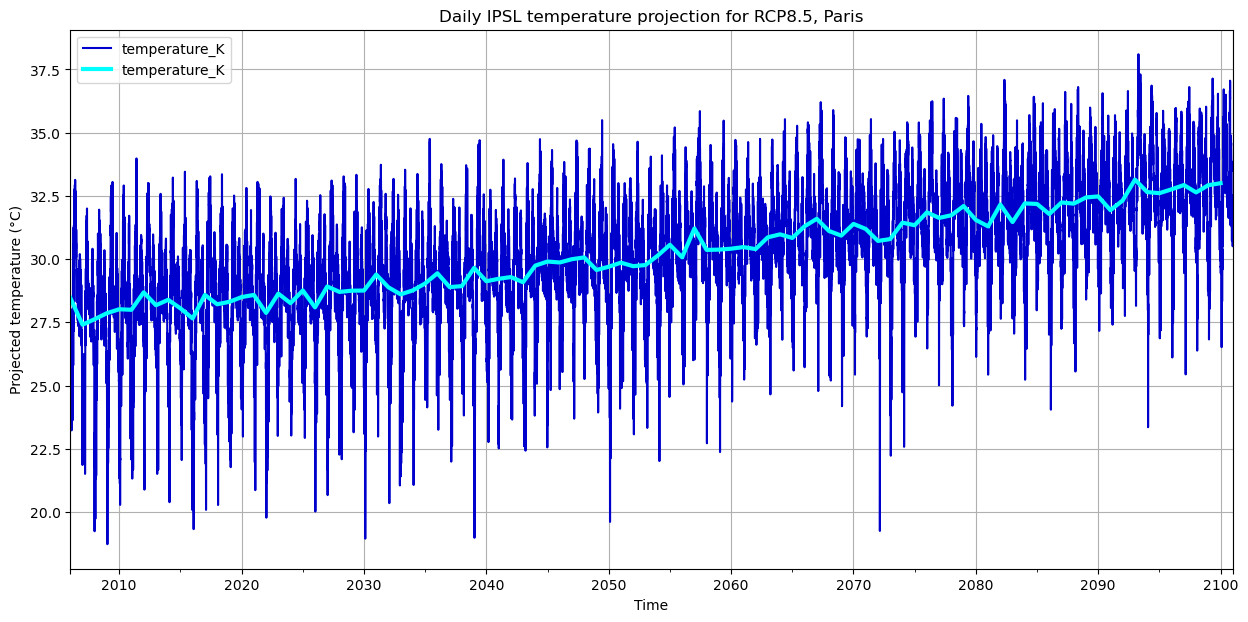

In [18]:
# Read the CSV file
file_path = 'data/paris_2006_2100_rcp85.csv'
tparp_df = pd.read_csv(file_path, delimiter = ",", index_col=0)
tparp_df.index = pd.to_datetime(tparp_df.index)
tparp_df = tparp_df - 273.15     # Model temperature was output in degrees K

# Dates of period to plot - by default, whole period
dts = dt.datetime(2006,1,1); dte = dt.datetime(2020,1,1)

# Plot the projected temperature
ax2 = tparp_df.plot(figsize=(15, 7),color=pcol)               # By default, for the whole period available
tparp_df.resample('YE').mean().plot(ax=ax2,color=pcom,linewidth=3)
#ax2 = tparp_df[dts:dte].plot(figsize=(15, 7),color='mediumblue')     # For a specific period, from dts to dte
#tparp_df[dts:dte].resample('YE').mean().plot(ax=ax2,color='aqua',linewidth=3)
plt.xlabel('Time')
plt.ylabel('Projected temperature (°C)')
plt.title('Daily IPSL temperature projection for RCP8.5, Paris')
plt.grid()
plt.show()

In [19]:
def every_yr_hw_proj(tdf,start_date, end_date, thresh, N,varh='temperature_K',colh='green'):
    # Génération du DatetimeIndex
    date_range = pd.date_range(start=start_date, end=end_date, freq='YS') 

    nbhw_dys = []

    for i in range(len(date_range)-1):
        start_time = date_range[i]
        end_time = date_range[i+1]
        tdflim = tdf[(tdf.index >= start_time) & (tdf.index < end_time)]
        tas = tdflim[varh].values   #  - 273.15
        hwevents_max = detect_heatwaves(tas, thresh, N)
        nbhw_dys.append(sum(hwevents_max))

    plt.plot(date_range[:-1], nbhw_dys,color=colh)
    plt.title(f"Number of heatwave days per year for a threshold of {thresh}°C overpassed for {N} consecutive days, for the period {start_date}/{end_date}")
    plt.grid()
    plt.show()
    return date_range,nbhw_dys

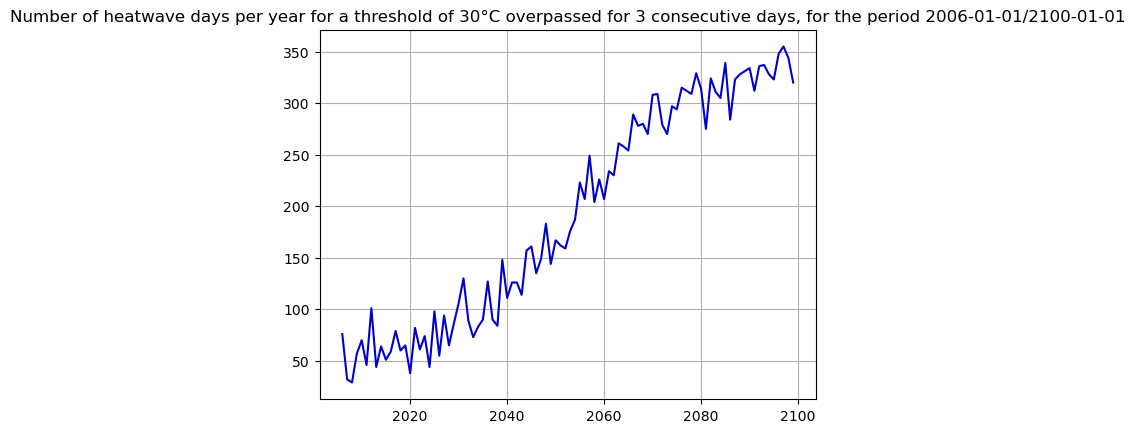

In [20]:
thresh = 30
N = 3

# Start and end dates
start_date = "2006-01-01"
end_date = "2100-01-01"
dtparp,hwparp = every_yr_hw_proj(tparp_df,start_date, end_date, thresh, N,colh=pcol)

#### For Mumbai

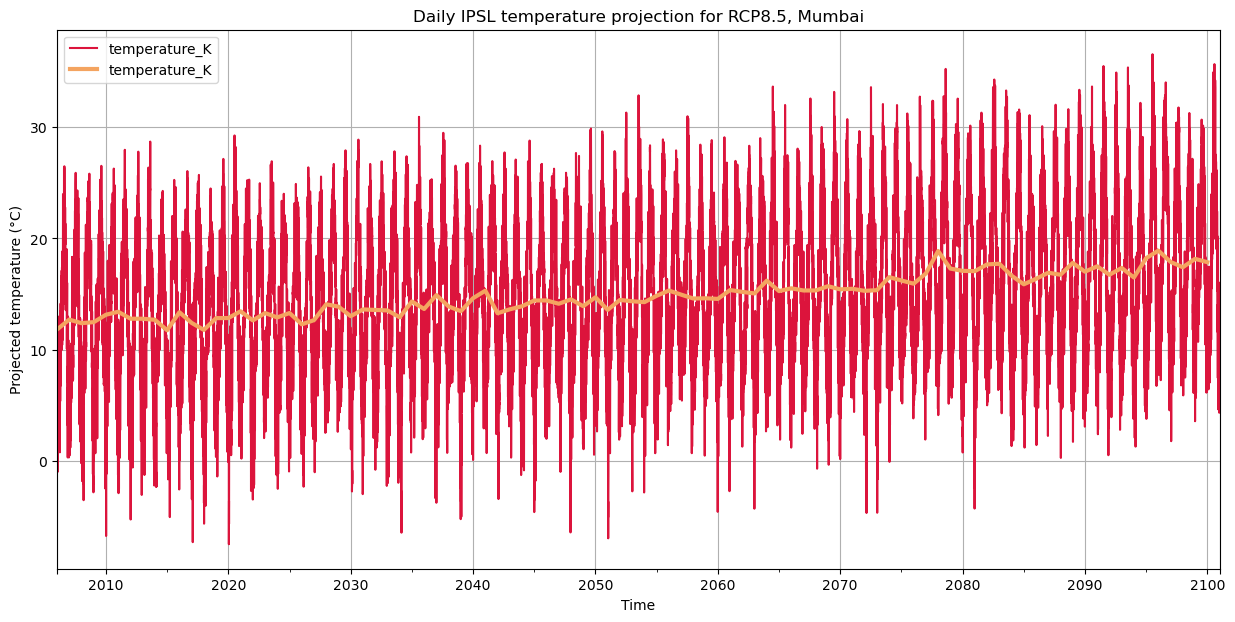

In [21]:
# Lire le fichier CSV
file_path = 'data/mumbai_2006_2100_rcp85.csv'
tmump_df = pd.read_csv(file_path, delimiter = ",", index_col=0)
tmump_df.index = pd.to_datetime(tparp_df.index)
tmump_df = tmump_df - 273.15     # Model temperature was output in degrees K

# Dates of period to plot - by default, whole period
dts = dt.datetime(2006,1,1); dte = dt.datetime(2020,1,1)

# Plot the projected temperature
ax2 = tmump_df.plot(figsize=(15, 7),color=mcol)               # By default, for the whole period available
tmump_df.resample('YE').mean().plot(ax=ax2,color=mcom,linewidth=3)
plt.xlabel('Time')
plt.ylabel('Projected temperature (°C)')
plt.title('Daily IPSL temperature projection for RCP8.5, Mumbai')
plt.grid()
plt.show()

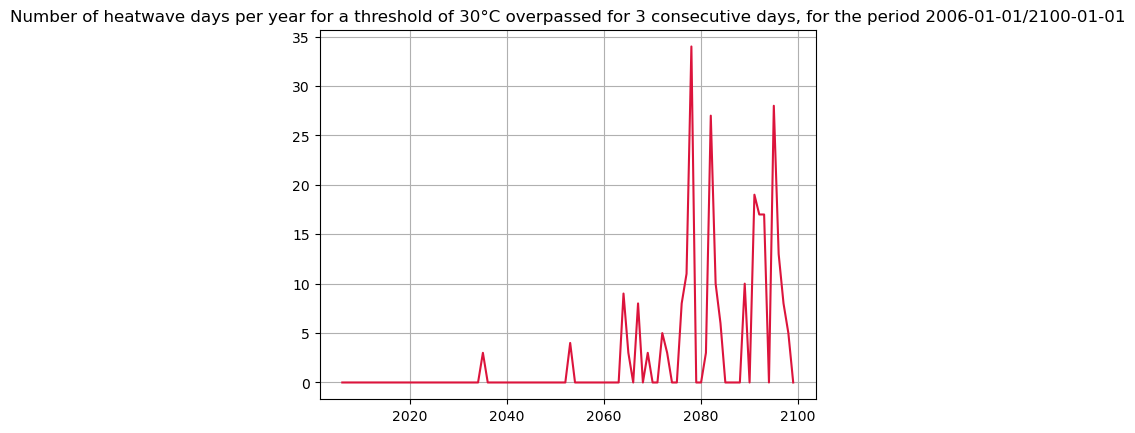

In [22]:
thresh = 30
N = 3

# Définition des dates de début et de fin
start_date = "2006-01-01"
end_date = "2100-01-01"
dtmump,hwmump = every_yr_hw_proj(tmump_df,start_date, end_date, thresh, N,colh=mcol)

## To Go further

As suggested above, a single, or absolute, threshold is not necessarily the most relevant indicator: it only focuses on events of intense heat, and the appropriate definition of *'intense heat'* will vary geographically. How can we adapt the calculation of the number of heatwave days per year, taking into account what has been 'normal temperatures' for a given location (ie *the climatology*)?

We suggest that you establish thresholds that are location- and month-dependent. Historical data for a reference period serves to identify what is *'normal'*. Quantiles can be used to identify extremes.  

We suggest to use the method *quantile* that can be applied to a pandas DataFrame. It is illustrated below for historical temperatures in Paris. 

In [23]:
print((tparh_df.quantile(0.25),tparh_df.quantile(0.5),tparh_df.quantile(0.75))) 
tparh_df.describe()

(ta_regionale    7.08185
Name: 0.25, dtype: float64, ta_regionale    11.7035
Name: 0.5, dtype: float64, ta_regionale    17.23905
Name: 0.75, dtype: float64)


,ta_regionale
count,10958.000000
mean,11.845633
std,6.630484
min,-12.599200
25%,7.081850
50%,11.703500
75%,17.239050
max,31.201800


In [24]:
# Calcul du 95e percentile 
percentile_95 = tparh_df.quantile(0.95)

# Affichage du résultat
print(f"Le 95e percentile de la température régionale est: {percentile_95.values}°C")

Le 95e percentile de la température régionale est: [21.88113]°C


If you take a certain percentile as a threshold during the whole year, you only take into account abnormally hot days for the whole year, but not for a given season. For example, winter days will never experience "hot days" according to this definition. But abnormally hot days compared to cold temperature, even if the absolute value stays low, can have significant impact on plant development. How would you take into account this seasonal dependence ?

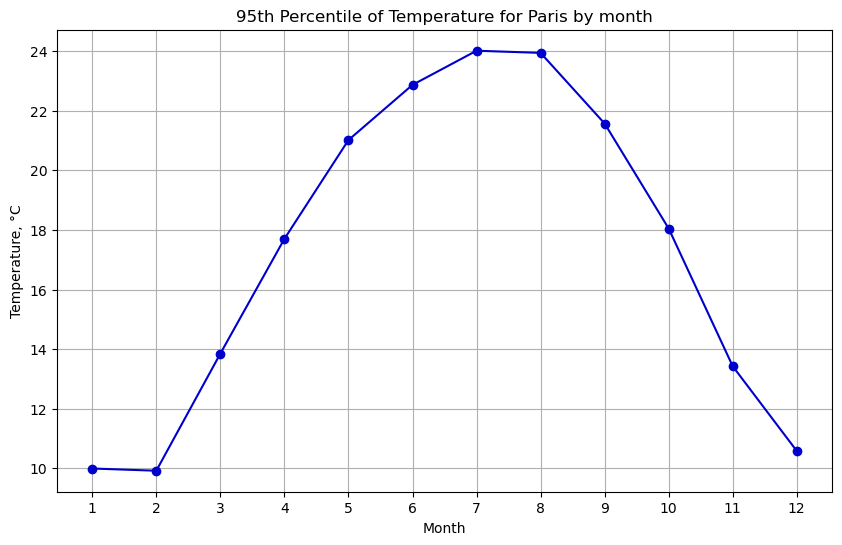

In [25]:
def calculate_monthly_percentile(df,nperc=95,region="region",colh='green'):
    """ Calculate the nth percentile (with n = nperc) by month for a given dataframe
    (Initially written only for the 95th percentile)
    """
    # Create a dolumn 'month' in the DataFrame
    df['month'] = df.index.month

    # Calculate the nperc percentile for each month
    monthly_percentile_95 = df.groupby('month')['ta_regionale'].quantile(nperc/100) 
    #print(monthly_percentile_95)
    # Prepare figure of the nperc percentile by month
    plt.figure(figsize=(10, 6))
    monthly_percentile_95.plot(marker='o',color=colh)
    plt.title(f'{nperc}th Percentile of Temperature for {region} by month')
    plt.xlabel('Month')
    plt.ylabel('Temperature, °C')
    plt.xticks(range(1,13))
    plt.grid(True)
    plt.show()

    return monthly_percentile_95

# Appeler la fonction et obtenir les résultats
monthly_percentile_95P = calculate_monthly_percentile(tparh_df, 95, region = "Paris",colh=pcol)

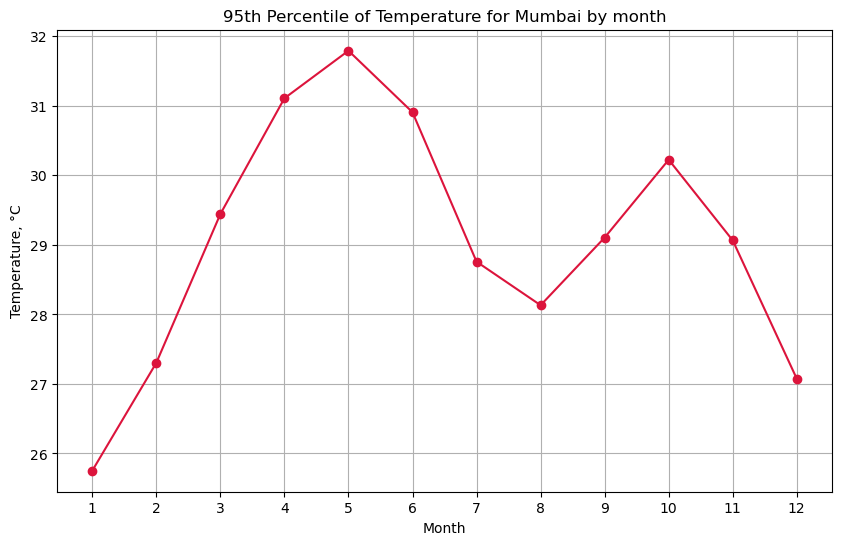

In [26]:
# Appeler la fonction et obtenir les résultats
monthly_percentile_95M = calculate_monthly_percentile(tmumh_df, nperc=95, region = "Mumbai",colh=mcol)

In [27]:
def detect_heatwaves_movingthresh(projdf, quant, nb_days):
    """
    Detect heatwave events in the daily temperature array.

    Parameters:
    projdf (list or array-like): df of projected temperatures
    quant (float or int): df of moving thresholds
    nb_days (int): The minimum number of consecutive days for an event to be considered a heatwave.
    Returns:
    list: A list of 0s and 1s where 1 indicates a day that is part of a heatwave event.
    """
    heatwave_events = [0] * len(projdf)
    consecutive_days = 0

    for i, (date, row) in enumerate(projdf.iterrows()):
        if row['temperature_K'] > quant.loc[row["months"]] :
            consecutive_days += 1
        else:
            if consecutive_days >= nb_days:
                for j in range(i - consecutive_days, i):
                    heatwave_events[j] = 1
            consecutive_days = 0

    # Check at the end of the array
    if consecutive_days >= nb_days:
        for j in range(len(projdf) - consecutive_days, len(projdf)):
            heatwave_events[j] = 1

    return heatwave_events


def every_yr_hw_moving(start_date, end_date, projdf, quant, N,colh='green'):
    # Génération du DatetimeIndex
    date_range = pd.date_range(start=start_date, end=end_date, freq='YS') 

    nbhw_dys = []

    for i in range(len(date_range)-1):
        start_time = date_range[i]
        end_time = date_range[i+1]
        filtered_dfs = projdf[(projdf.index >= start_time) & (projdf.index < end_time)]
        hwevents_max = detect_heatwaves_movingthresh(filtered_dfs, quant, N)
        nbhw_dys.append(sum(hwevents_max))

    plt.plot(date_range[:-1], nbhw_dys,color=colh)
    plt.title(f"Number of heatwave days per year for a threshold of 95th percentile overpassed for {N} consecutive days, for the period {start_date}-{end_date}")
    plt.grid()
    plt.show()
    return None


In [28]:
tparp_df["months"] = tparp_df.index.month
monthly_percentile_95P.columns = ["Temperature_K"]

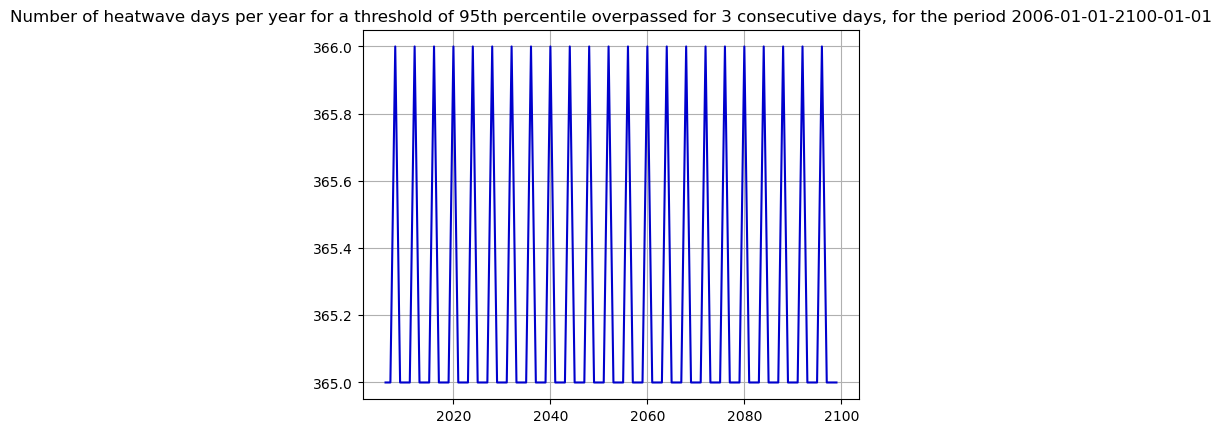

In [29]:
quant = monthly_percentile_95P
N = 3

# Définition des dates de début et de fin
start_date = "2006-01-01"
end_date = "2100-01-01"
every_yr_hw_moving(start_date, end_date, projdf = tparp_df, quant=quant, N=N, colh=pcol) 

In [30]:
tmump_df["months"] = tmump_df.index.month
monthly_percentile_95P.columns = ["Temperature_K"]

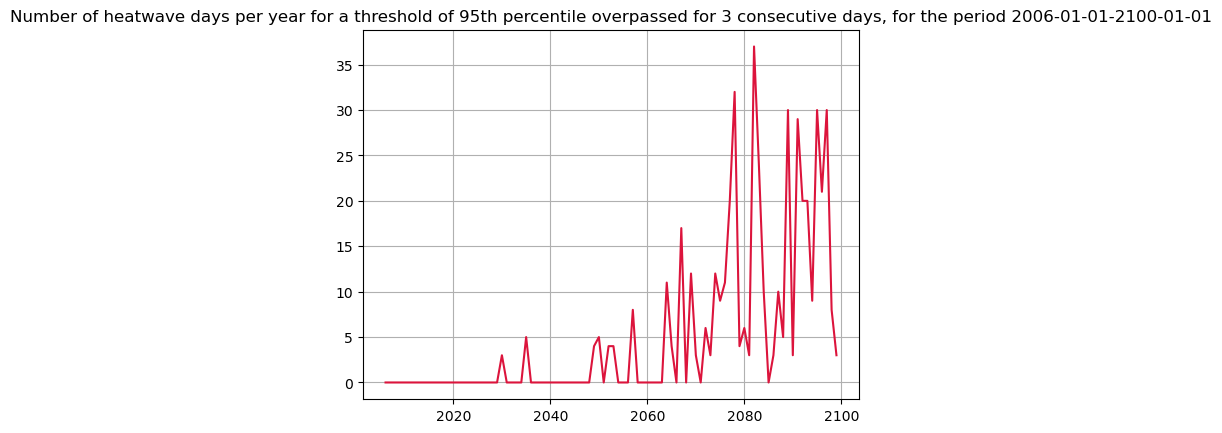

In [31]:
quant = monthly_percentile_95M
N = 3

# Définition des dates de début et de fin
start_date = "2006-01-01"
end_date = "2100-01-01"
every_yr_hw_moving(start_date, end_date, projdf = tmump_df, quant=quant, N=N, colh=mcol) 